In [1]:
import numpy as np
import torch_geometric as pyg
import HGScore.model as md
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
model_path = "../models/model.ckpt"
model = md.Model.load_from_checkpoint(model_path)

In [3]:
def get_df_abs_mean_weight(layer_name: str, nb_fts_init, nb_fts_after_lin):
    # The input of the that first layer with edge fts use in input:
    # The concatenation of the lin1(node_fts){48} + edge_fts{6}
    # That is why there are a input vector of 48 + 6
    layer_weights = model.model.gcn_atm.conv_list[0].state_dict()[layer_name][:, 48:]
    w_sum = nb_fts_init*[0]
    for i in range(nb_fts_after_lin):
        for j in range(nb_fts_init):
            w_sum[j] += layer_weights[i][j].item()

    mean_weights = np.abs(np.array(w_sum)/nb_fts_after_lin)
    fts = ['Length', 'Aromatic Cycle', 'Ring', 'Simple', 'Double', 'Triple']
    df = pd.DataFrame(data=[fts, mean_weights]).transpose()
    df = df.rename(columns={0: "Feature", 1: "Absolute Mean Weight"})
    return df

[Text(0.5, 1.0, 'Protein -> Protein Edge feature importance (based on the first layer)')]

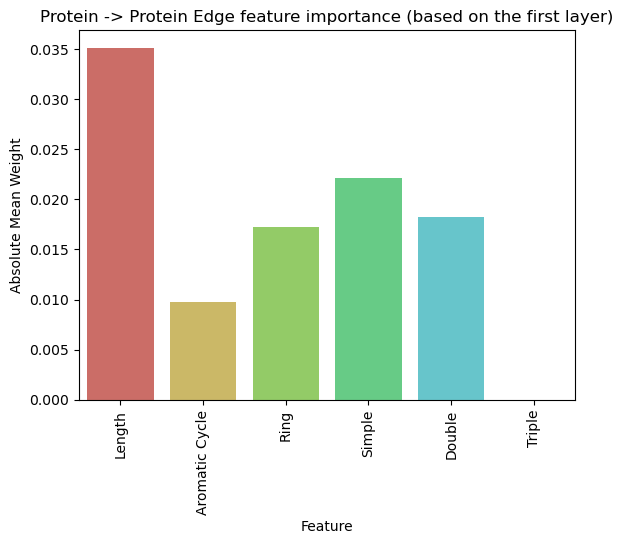

In [4]:
df_ptop = get_df_abs_mean_weight('convs.protein_atoms__linked_to__protein_atoms.gate_conv.lin1.weight', 6, 48)
ax = sns.barplot(data=df_ptop, x="Feature", y="Absolute Mean Weight", palette=sns.color_palette("hls", 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Protein -> Protein Edge feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Ligand -> Ligand Edge feature importance (based on the first layer)')]

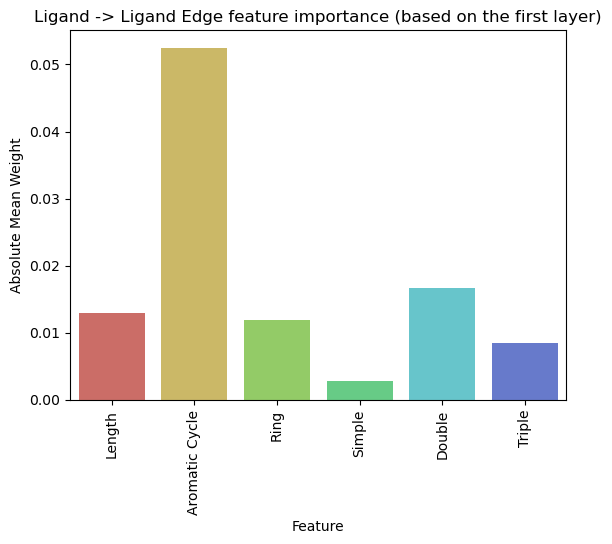

In [5]:
df_ltol = get_df_abs_mean_weight('convs.ligand_atoms__linked_to__ligand_atoms.gate_conv.lin1.weight', 6, 48)
ax = sns.barplot(data=df_ltol, x="Feature", y="Absolute Mean Weight", palette=sns.color_palette("hls", 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Ligand -> Ligand Edge feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Ligand -> Protein Edge feature importance (based on the first layer)')]

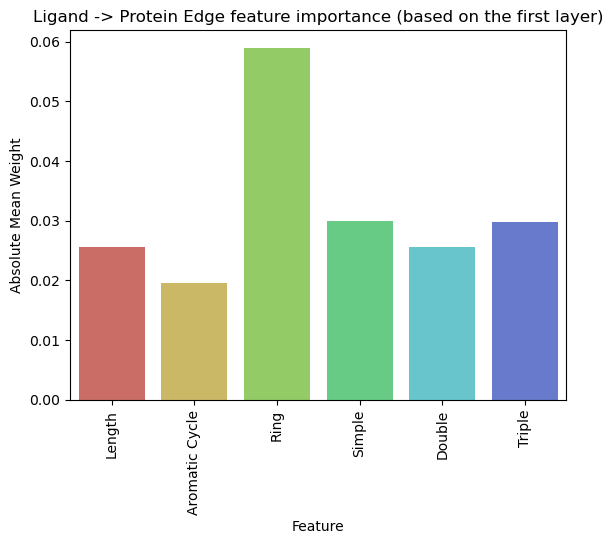

In [6]:
df_ltop = get_df_abs_mean_weight('convs.ligand_atoms__interact_with__protein_atoms.gate_conv.lin1.weight', 6, 48)
ax = sns.barplot(data=df_ltop, x="Feature", y="Absolute Mean Weight", palette=sns.color_palette("hls", 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Ligand -> Protein Edge feature importance (based on the first layer)')

[Text(0.5, 1.0, 'Protein -> Ligand Edge feature importance (based on the first layer)')]

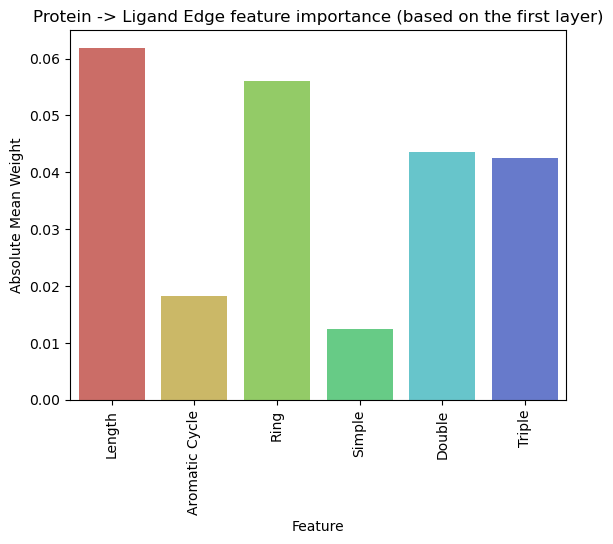

In [7]:
df_ptol = get_df_abs_mean_weight('convs.protein_atoms__interact_with__ligand_atoms.gate_conv.lin1.weight', 6, 48)
ax = sns.barplot(data=df_ptol, x="Feature", y="Absolute Mean Weight", palette=sns.color_palette("hls", 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(title='Protein -> Ligand Edge feature importance (based on the first layer)')